# Tangherlini solution

This notebook calculates the Tangherlini solution in the case of 5 dimensions (1 temporal, 4 spatial). First of all we define the metric.

Remember that the time coordinate must be the first coordinate.
Function A(r) is already defined
Function B(r) is already defined
The metric has been redefined. Standard tensors have been deleted.

Dimension = 5
Coordinates = t,r,theta,phi,psi
Metric defined successfully: 



<IPython.core.display.Math object>

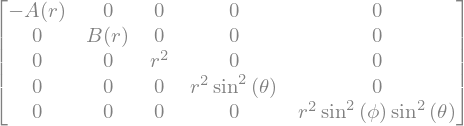

In [92]:
import pytearcat as pt

t, r, theta, phi, psi = pt.coords('t,r,theta,phi,psi')
A = pt.fun('A', 'r')
B = pt.fun('B', 'r')
ds = 'ds2 = -A*dt**2 + B*dr**2 + r**2*(dtheta**2 + sin(theta)**2*dphi**2 + sin(theta)**2*sin(phi)**2*dpsi**2)'
g = pt.metric(ds)

Then we calculate the Ricci tensor, which in vacuum must be equal to zero.

$$
R_{\mu\nu}=0
$$

<IPython.core.display.Latex object>

  0%|          | 0/125 [00:00<?, ?it/s]

<IPython.core.display.Latex object>

  0%|          | 0/625 [00:00<?, ?it/s]

<IPython.core.display.Latex object>

  0%|          | 0/25 [00:00<?, ?it/s]

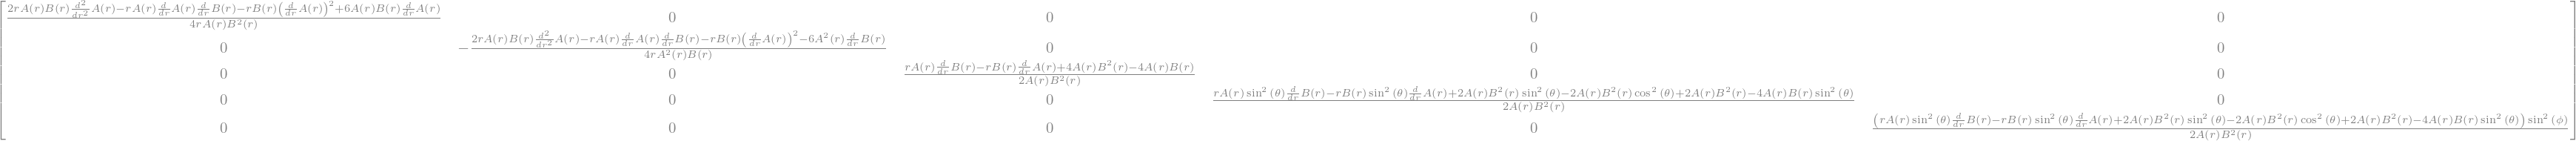

In [93]:
R = pt.ricci()

R.display()

We can use just two of the five equations provided because we only have two unknowns ($A(r)$ and $B(r)$). Moreover, we assume the solution exists. $R_{00}=0$ and $R_{11}=0$ are the equations I chose. In the cell below we solve them.

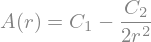

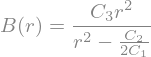

In [94]:
import sympy as sp

sols = sp.solvers.ode.systems.dsolve_system([R("_0,_0"), R("_1,_1")], funcs=[A, B], t=r, simplify=True)

display(sols[0][0].simplify())
display(sols[0][1])

Imposing $A(r \to \infty)=1$ and $B(r \to \infty)=1$ gives $C_1=1$ and $C_3=1$. $C_2$ is a free parameter and we will rename it to $\mu$ in the following. Below are the two solutions.

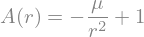

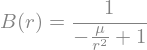

In [95]:
mu = sp.symbols('mu')

A_sol = 1 - mu / r**2
B_sol = 1 / A_sol

eq_A = sp.Eq(A, A_sol)
eq_B = sp.Eq(B, B_sol)

display(eq_A, eq_B)

Below is a quick check to see if $A(r)$ and $B(r)$ solve the system of equations.

In [96]:
for j in range(5):
	R_jj = R(f"_{j},_{j}").subs({A: A_sol, B: B_sol})
	numerator, denominator = sp.fraction(sp.simplify(R_jj))
	if numerator.expand().simplify() != 0:
		print(f"The given solution doesn't solve the R_{j}{j} equation.")
		break
	
	if j == 4:
		print("The given solution solves all the Ricci equations.")

The given solution solves all the Ricci equations.
